In [1]:
from matplotlib import pyplot as plt
import pandas
import seaborn as sns

%matplotlib inline

FIG_WIDTH=20
FIG_HEIGTH=8


# Debian Xorg + GNOME tests
Those tests were run in my regular workstation, using GNOME + Xorg

|                |   count |    mean |      std |   min |     25% |    50% |     75% |   max |
|:---------------|--------:|--------:|---------:|------:|--------:|-------:|--------:|------:|
| mlterm         |     200 | 28.8349 | 6.23246  | 15.16 | 31.235  | 31.665 | 32.0425 | 32.65 |
| uxterm         |     200 | 29.8086 | 5.01335  | 15.39 | 31.25   | 31.525 | 31.9025 | 32.5  |
| konsole        |     199 | 31.7569 | 1.20074  | 16.22 | 31.52   | 31.8   | 32.12   | 35.07 |
| alacritty      |     200 | 31.7943 | 0.560434 | 27.24 | 31.45   | 31.82  | 32.1625 | 33.11 |
| st             |     200 | 33.5791 | 5.03363  | 30.66 | 31.64   | 31.975 | 32.3225 | 49.33 |
| urxvt          |     200 | 47.4618 | 4.18906  | 31.81 | 48.245  | 48.58  | 49.0025 | 49.7  |
| pterm          |     200 | 48.2193 | 2.63108  | 31.24 | 48.23   | 48.595 | 48.96   | 49.76 |
| gnome-terminal |     200 | 48.303  | 2.40031  | 32.18 | 48.2675 | 48.635 | 48.9525 | 55.12 |
| xfce4-terminal |     200 | 48.3829 | 2.00524  | 

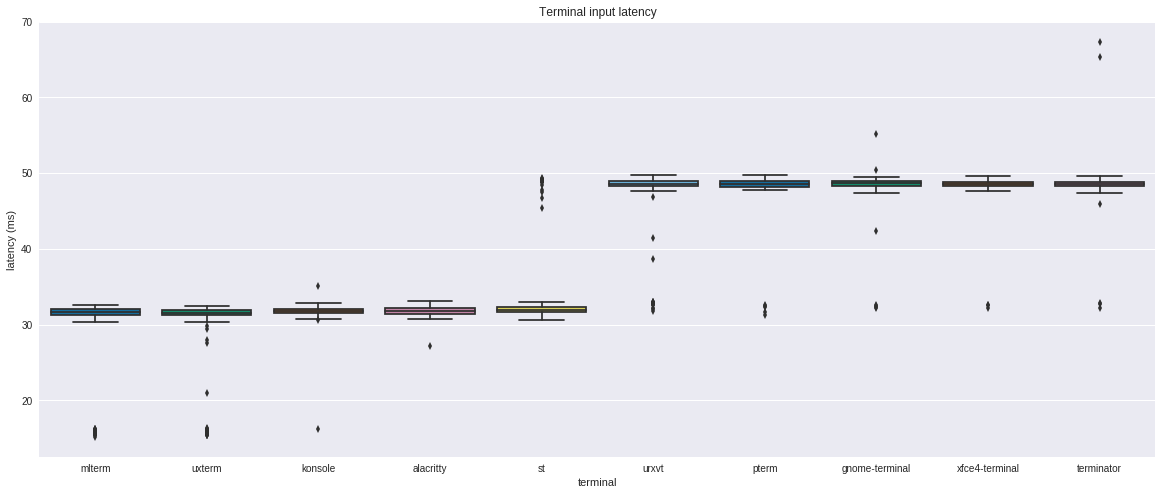

In [2]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/debian9-xorg.csv')
# remove weird outlier in konsole
latency = latency.apply(lambda x: x[(x<100)], axis=0)
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

from tabulate import tabulate
print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))


# Debian Xorg + i3
Those were run using a simpler session using the i3 window manager.

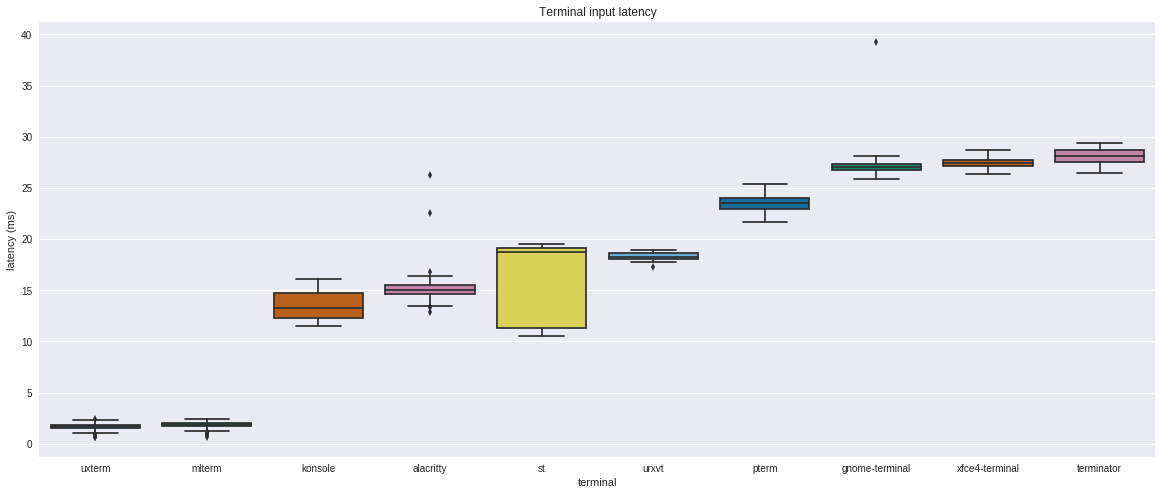

In [3]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/debian9-xorg-i3.csv')
latency.drop(["urxvt-xft-monospace", "urxvt-fixed-16", "urxvt-fixed-16-float"], axis=1, inplace=True)

latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


|                |   count |   mean |   std |   min |   50% |   90% |   max |
|:---------------|--------:|-------:|------:|------:|------:|------:|------:|
| uxterm         |     200 |    1.7 |   0.3 |   0.7 |   1.7 |   2   |   2.4 |
| mlterm         |     200 |    1.8 |   0.3 |   0.7 |   1.9 |   2.2 |   2.5 |
| vim.athena     |     200 |    2.8 |   1.1 |   0.4 |   2.9 |   3.5 |  12.7 |
| vim.gtk        |     200 |    3.9 |   1.2 |   0.7 |   4.2 |   4.8 |  11.9 |
| emacs -q       |     200 |    4.8 |   2.3 |   0.5 |   4.9 |   5.8 |  32.5 |
| gedit          |     200 |    8.9 |   3.4 |   2.8 |   9.8 |  12.5 |  14.2 |
| konsole        |     200 |   13.4 |   1.2 |  11.5 |  13.3 |  15   |  16.1 |
| alacritty      |     200 |   15.1 |   1.2 |  12.8 |  15.1 |  15.9 |  26.3 |
| st             |     200 |   15.7 |   3.9 |  10.6 |  18.8 |  19.4 |  19.6 |
| vim.gtk3       |     200 |   16.5 |   7.9 |   0.4 |  20.6 |  21.9 |  27.2 |
| urxvt          |     200 |   18.3 |   0.3 |  17.3 |  18.3 |  1

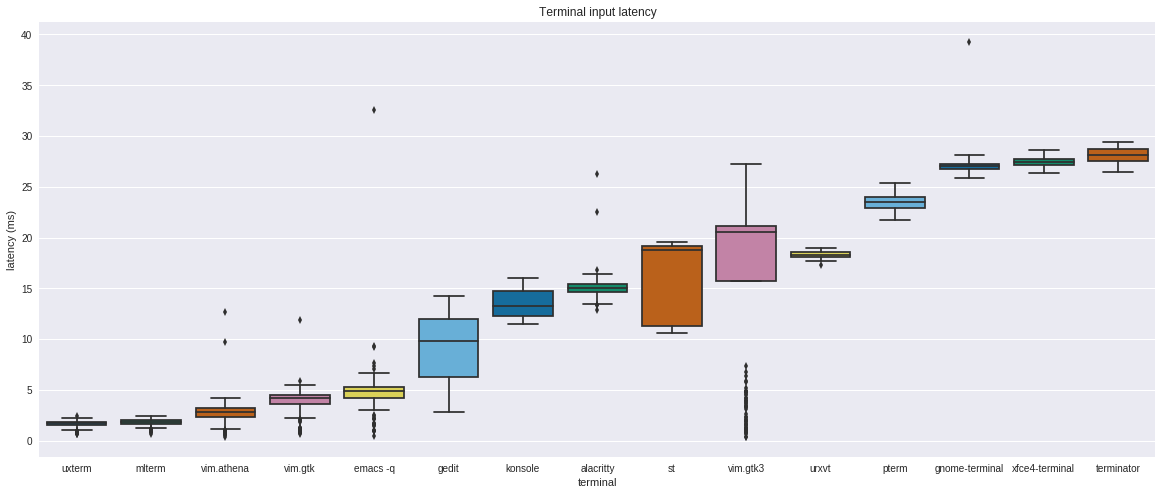

In [4]:
latency = pandas.concat([latency, pandas.read_csv('editors.csv')])

latency.drop("emacs", axis=1, inplace=True)
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

from tabulate import tabulate
print(tabulate(latency.describe(percentiles=[0.9]).round(1).transpose(), headers='keys', tablefmt='pipe'))

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


# Fedora GNOME + Xorg
Those tests were ran on Fedora 27 with the default GNOME + Xorg session. The tests crash completely in Wayland.

|                |   count |    mean |     std |   min |     25% |    50% |     75% |   max |
|:---------------|--------:|--------:|--------:|------:|--------:|-------:|--------:|------:|
| mlterm         |     200 | 16.732  | 6.52684 |  8.2  | 12.66   | 13.36  | 17.6    | 30.9  |
| uxterm         |     200 | 28.9527 | 3.73927 | 11.93 | 28.3675 | 29.49  | 30.63   | 37.59 |
| konsole        |     200 | 29.8188 | 2.14301 | 21.95 | 28.5575 | 29.75  | 30.725  | 41.72 |
| st             |     200 | 30.4384 | 3.81713 | 21.99 | 28.345  | 29.875 | 31.7525 | 46.11 |
| pterm          |     200 | 42.1507 | 5.62529 | 29.58 | 34.2225 | 44.835 | 46.08   | 48.09 |
| urxvt          |     200 | 43.8995 | 4.9363  | 29.68 | 44.205  | 45.59  | 46.7625 | 50.7  |
| terminology    |     200 | 44.3843 | 4.80309 | 29.76 | 44.6625 | 46     | 46.8125 | 57.95 |
| gnome-terminal |     200 | 45.9754 | 1.94185 | 35.14 | 45.505  | 46.345 | 46.8225 | 53.88 |
| xfce4-terminal |     200 | 46.1249 | 1.85098 | 35.16 | 45.

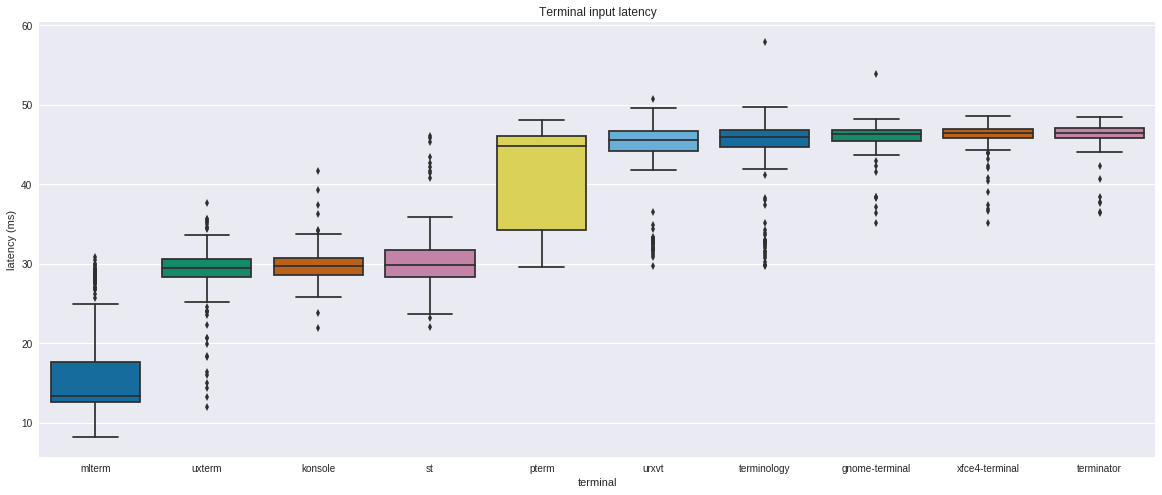

In [5]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/fedora27-xorg.csv')
latency = latency.reindex_axis(latency.mean().sort_values().index, axis=1)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))


# Processing time (wall time)

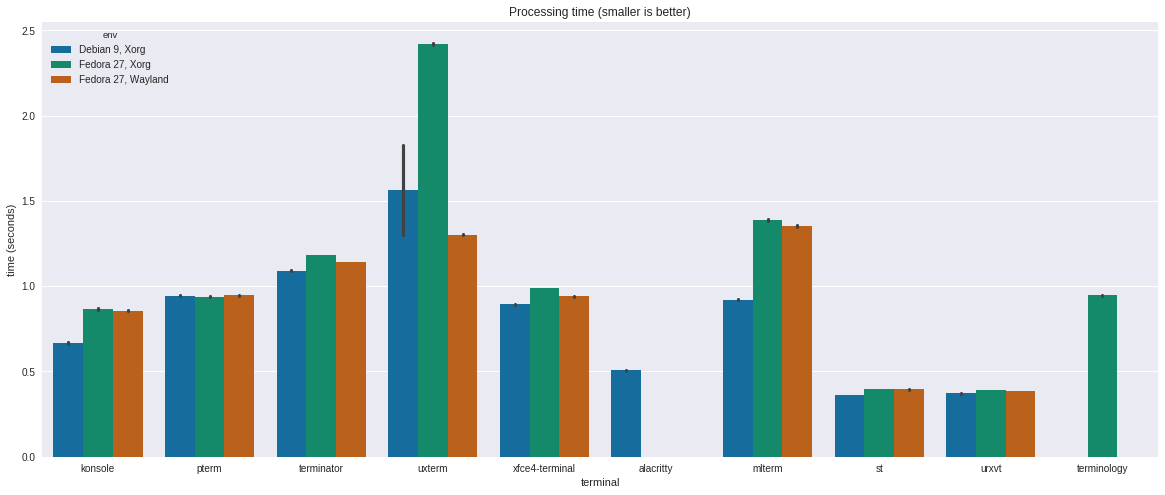

In [6]:
deb9_xorg = pandas.read_csv('debian9-xorg-prime-100x100000.csv').assign(env='Debian 9, Xorg')
f27_xorg = pandas.read_csv('fedora27-xorg-prime-100x100000.csv').assign(env='Fedora 27, Xorg')
f27_wayland = pandas.read_csv('fedora27-wayland-prime-100x100000.csv').assign(env='Fedora 27, Wayland')

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

data = pandas.concat([deb9_xorg, f27_xorg, f27_wayland])
data['terminal'].replace(['stterm'], 'st',inplace=True)

ax = sns.barplot(data=data, x='terminal', y='wtime', palette='colorblind', hue='env')
ax.set_title('Processing time (smaller is better)')
ax.set_ylabel('time (seconds)')

# system time

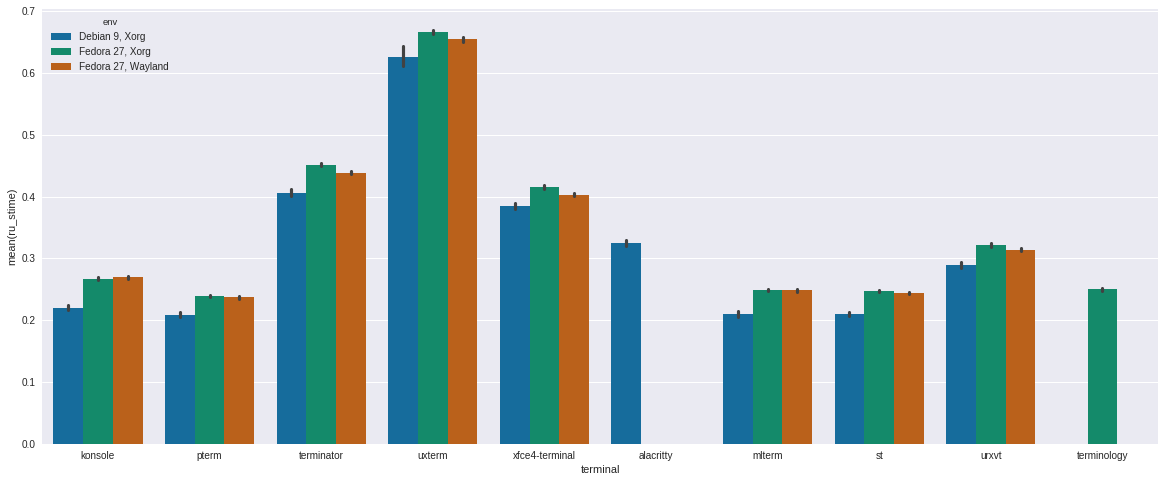

In [7]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_stime', palette='colorblind', hue='env')

# user time

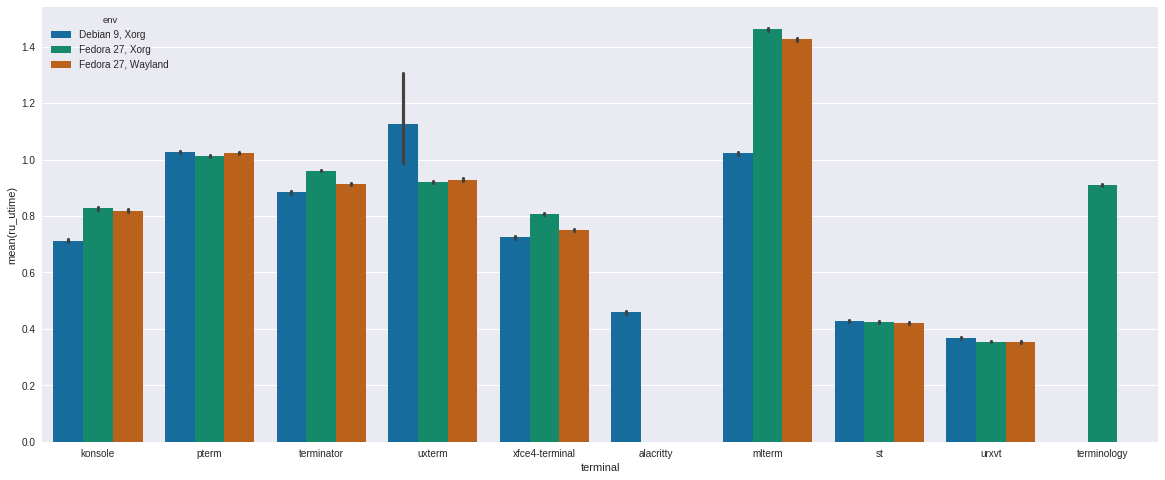

In [8]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_utime', palette='colorblind', hue='env')

# Memory usage

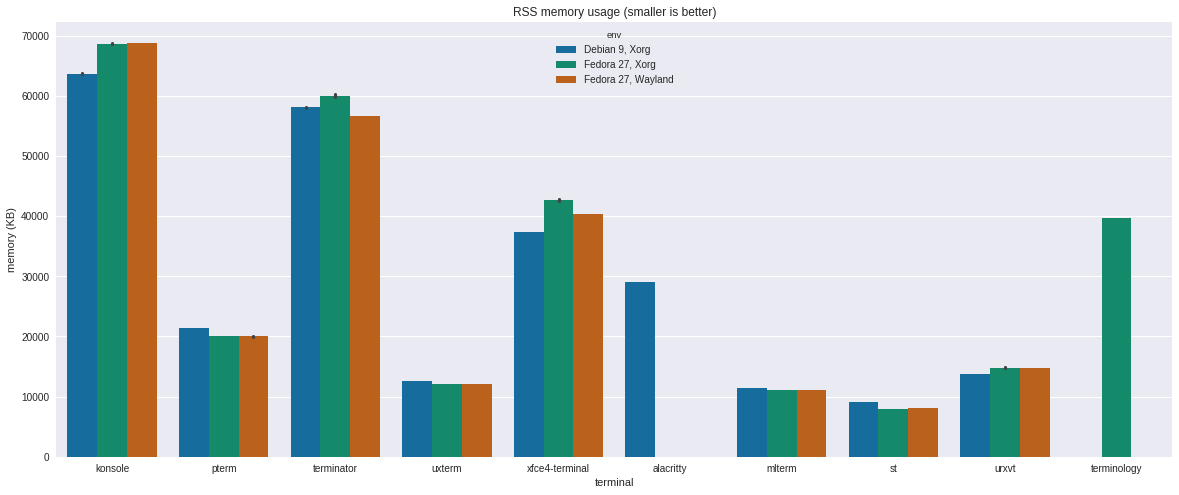

In [9]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_maxrss', palette='colorblind', hue='env')
ax.set_title('RSS memory usage (smaller is better)')
ax.set_ylabel('memory (KB)')


# I/O usage

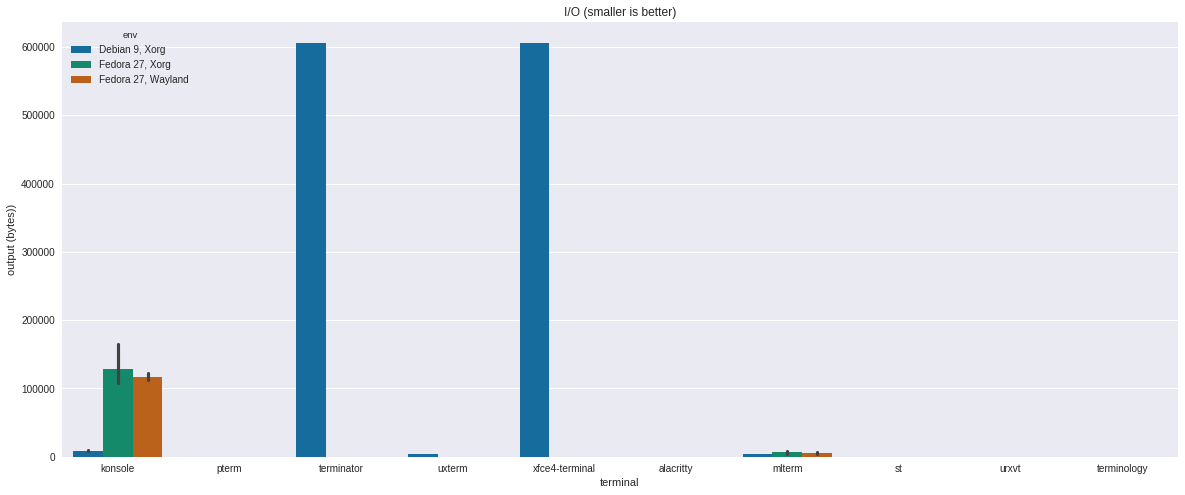

In [10]:
data['blocks'] = data['ru_inblock'] + data['ru_oublock']

# https://lkml.org/lkml/2007/3/19/84
# "block size" is apparently hardcoded to 512 bytes
data['out_bytes'] = data['ru_oublock'] * 512
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='out_bytes', palette='colorblind', hue='env')
ax.set_title('I/O (smaller is better)')
ax.set_ylabel('output (bytes))')

In [27]:
from tabulate import tabulate

#print(tabulate(latency.describe().transpose(), headers='keys', tablefmt='pipe'))
#print(tabulate(data.groupby('terminal').describe(), headers='keys', tablefmt='pipe'))
desc = data.drop(['n', 'blocks', 'count', 'index', 'env', 'ru_idrss', 'ru_inblock', 'ru_isrss', 'ru_ixrss', 'ru_majflt', 'ru_minflt', 'ru_msgrcv', 'ru_msgsnd', 'ru_nivcsw', 'ru_nsignals', 'ru_nswap', 'ru_nvcsw', 'ru_oublock'], axis=1)
table = desc.groupby('terminal').describe(percentiles=[0.9]).round(2)

#for col in table:
#    print("row: %r" % (table[col]))
print(tabulate(table, headers='keys', tablefmt='pipe'))
pandas.options.display.max_rows = 2000
table
#temp = table.reset_index()
#newdf = temp.pivot(index='terminal',columns='ru_maxrss')
#newdf.columns.name = ''
#newdf
#desc.groupby('terminal').stack()
#print(tabulate(rss.describe(percentiles=[0.9]), headers='keys', tablefmt='pipe'))
#desc.groupby('terminal').describe(percentiles=[0.9])

|                             |        out_bytes |   ru_maxrss |   ru_stime |   ru_utime |   wtime |
|:----------------------------|-----------------:|------------:|-----------:|-----------:|--------:|
| ('alacritty', 'count')      |    100           |      100    |     100    |     100    |  100    |
| ('alacritty', 'mean')       |      0           |    29032.9  |       0.32 |       0.46 |    0.51 |
| ('alacritty', 'std')        |      0           |      138.18 |       0.02 |       0.03 |    0.01 |
| ('alacritty', 'min')        |      0           |    28688    |       0.27 |       0.39 |    0.5  |
| ('alacritty', '50%')        |      0           |    29072    |       0.32 |       0.46 |    0.51 |
| ('alacritty', '90%')        |      0           |    29157.2  |       0.36 |       0.49 |    0.51 |
| ('alacritty', 'max')        |      0           |    29276    |       0.4  |       0.52 |    0.53 |
| ('konsole', 'count')        |    300           |      300    |     300    |     300    | 

out_bytes  ru_maxrss  ru_stime  ru_utime   wtime
terminal                                                               
alacritty      count      100.00     100.00    100.00    100.00  100.00
               mean         0.00   29032.92      0.32      0.46    0.51
               std          0.00     138.18      0.02      0.03    0.01
               min          0.00   28688.00      0.27      0.39    0.50
               50%          0.00   29072.00      0.32      0.46    0.51
               90%          0.00   29157.20      0.36      0.49    0.51
               max          0.00   29276.00      0.40      0.52    0.53
konsole        count      300.00     300.00    300.00    300.00  300.00
               mean     84855.47   67052.12      0.25      0.79    0.80
               std     111979.56    2397.00      0.03      0.06    0.10
               min       8192.00   62804.00      0.16      0.64    0.63
               50%      81920.00   68462.00      0.26      0.81    0.84
               90%     135168.00   69153.20      0.28      0.85    0.89
               max    1769472.00   69344.00      0.30      0.90    1.01
mlterm         count      300.00     300.00    300.00    300.00  300.00
               mean      5515.95   11194.39      0.24      1.30    1.22
               std       8025.74     181.41      0.02      0.20    0.21
               min       4096.00   10868.00      0.16      0.98    0.90
               50%       4096.00   11144.00      0.24      1.42    1.35
               90%       4096.00   11444.00      0.26      1.48    1.41
               max      53248.00   11652.00      0.28      1.56    1.51
pterm          count      300.00     300.00    300.00    300.00  300.00
               mean        13.65   20495.49      0.23      1.02    0.94
               std        236.48     688.35      0.02      0.02    0.01
               min          0.00   19652.00      0.17      0.96    0.91
               50%          0.00   20198.00      0.23      1.02    0.94
               90%          0.00   21537.60      0.25      1.05    0.96
               max       4096.00   21728.00      0.27      1.10    1.00
st             count      400.00     400.00    400.00    400.00  400.00
               mean         0.00    8546.45      0.23      0.43    0.38
               std          0.00     543.25      0.02      0.02    0.02
               min          0.00    7972.00      0.14      0.36    0.34
               50%          0.00    8564.00      0.23      0.42    0.38
               90%          0.00    9088.00      0.26      0.46    0.40
               max          0.00    9092.00      0.28      0.50    0.43
terminator     count      300.00     300.00    300.00    300.00  300.00
               mean    202069.33   58244.85      0.43      0.92    1.14
               std     286246.67    1514.50      0.03      0.04    0.04
               min          0.00   56224.00      0.34      0.80    1.07
               50%          0.00   58048.00      0.44      0.92    1.14
               90%     606208.00   60792.00      0.46      0.97    1.18
               max     606208.00   61420.00      0.51      1.01    1.20
terminology    count      100.00     100.00    100.00    100.00  100.00
               mean         0.00   39740.96      0.25      0.91    0.95
               std          0.00     170.98      0.01      0.02    0.02
               min          0.00   39452.00      0.23      0.86    0.90
               50%          0.00   39716.00      0.25      0.91    0.95
               90%          0.00   39916.40      0.26      0.94    0.97
               max          0.00   40520.00      0.28      0.98    1.00
urxvt          count      300.00     300.00    300.00    300.00  300.00
               mean         0.00   14473.19      0.31      0.36    0.38
               std          0.00     514.30      0.02      0.02    0.01
               min          0.00   13536.00      0.24      0.31    0.36
               50%          0.00   14746.00      0.31      0.36